In [40]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss

In [41]:
H_actual = 1.0
N_p = 100

In [42]:
field = ss.fBm(N=4*N_p,E=2,H=H_actual,exp = False)

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


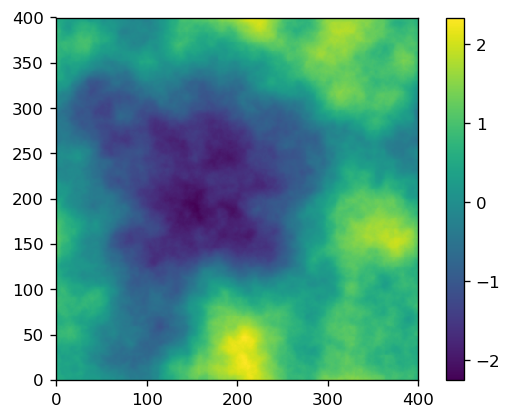

In [43]:
plt.figure(dpi=120)
plt.imshow(field, origin = 'lower')
plt.colorbar()
plt.show()

In [44]:
field = field[:N_p,:N_p]

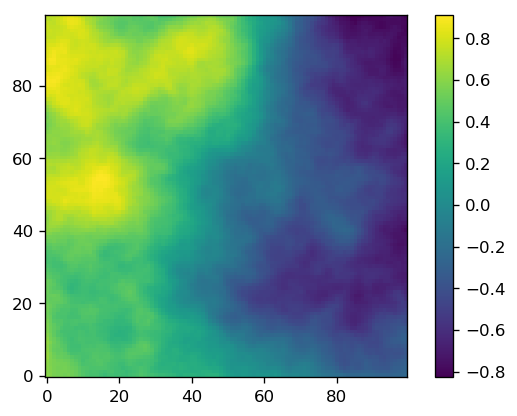

In [45]:
plt.figure(dpi=120)
plt.imshow(field, origin = 'lower')
plt.colorbar()
plt.show()

In [46]:
m_1_field = np.mean(field)
s_1_field = np.std(field)
m_2_field = 0
s_2_field = 1/4

field *= s_2_field/s_1_field
field += (m_2_field-m_1_field*s_2_field/s_1_field)

field[np.where(field>1.)] = 1.
field[np.where(field<-1.)] = -1.

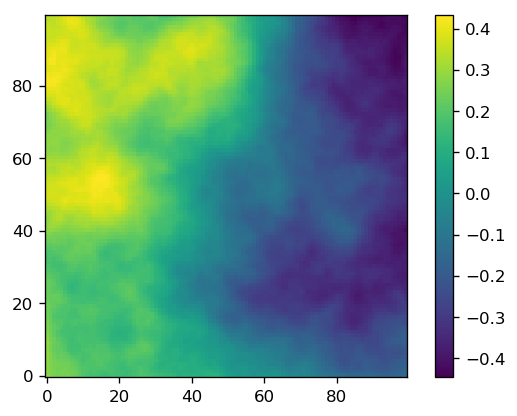

In [47]:
plt.figure(dpi=120)
plt.imshow(field, origin = 'lower')
plt.colorbar()
plt.show()

In [48]:
shape = np.shape(field)
img_size = shape[0]

In [49]:
N = img_size*2
x = np.zeros((N,N))
x[:img_size,:img_size] = field
X = x

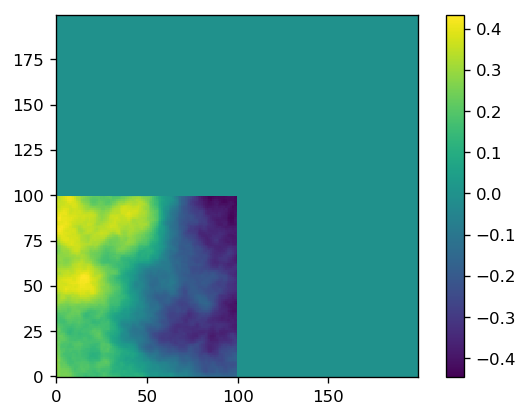

In [50]:
plt.figure(dpi=120)
plt.imshow(X, origin = 'lower')
plt.colorbar()
plt.show()

In [51]:
x = np.linspace(-2**-0.5,2**-0.5,N, dtype=np.float64)
y = np.linspace(-2**-0.5,2**-0.5,N, dtype=np.float64)
xv, yv = np.meshgrid(x,y)

In [52]:
r = np.sqrt(xv**2 + yv**2)
r /=np.max(r)

In [53]:
r = np.roll(r,int(N/2),0)
r = np.roll(r,int(N/2),1)

In [54]:
L = 1
v = 1.5

In [55]:
core = 4/(np.pi*L**2) * np.exp(-r**2/(L/2)**2)
annulus = 4 / (np.pi*L**2*(v**2-1))*(np.exp(-r**2/(v*L/2)**2)-np.exp(-r**2/(L/2)**2))

core = core/np.sum(core)
annulus = annulus/np.sum(annulus)

print(np.sum(core),np.sum(annulus))

mHat = core - annulus

1.0 1.0


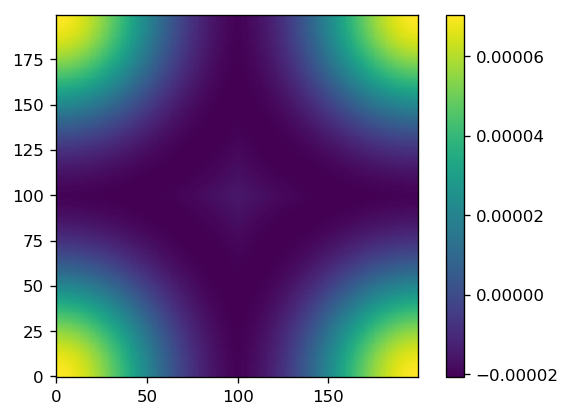

In [56]:
plt.figure(dpi=120)
plt.imshow(mHat, origin = 'lower')
plt.colorbar()
plt.show()

In [57]:
N = img_size*2
zeros = np.zeros((N,N))
ones = np.ones((img_size,img_size))
zeros[:img_size,:img_size] = ones
w = zeros

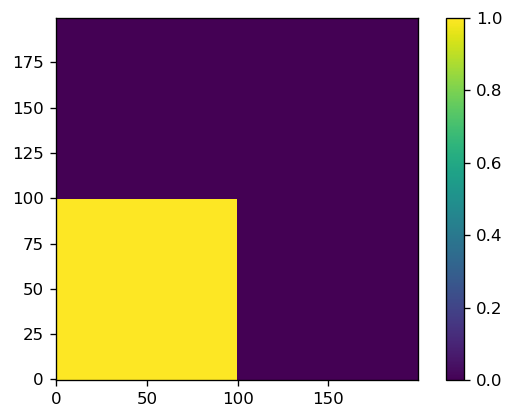

In [58]:
plt.figure(dpi=120)
plt.imshow(w, origin = 'lower')
plt.colorbar()
plt.show()

In [59]:
prod = np.fft.fftn(X)*np.fft.fftn(core)
G_core = np.fft.ifftn(prod).real
G_core = G_core[:img_size,:img_size]

prod = np.fft.fftn(X)*np.fft.fftn(annulus)
G_annulus = np.fft.ifftn(prod).real
G_annulus = G_annulus[:img_size,:img_size]

prod = np.fft.fftn(w)*np.fft.fftn(core)
W_core = np.fft.ifftn(prod).real
W_core = W_core[:img_size,:img_size]

prod = np.fft.fftn(w)*np.fft.fftn(annulus)
W_annulus = np.fft.ifftn(prod).real
W_annulus = W_annulus[:img_size,:img_size]

In [60]:
F = (G_core/W_core)-(G_annulus/W_annulus)

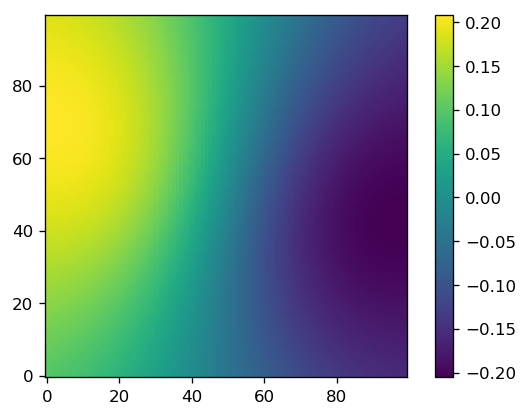

In [61]:
plt.figure(dpi=120)
plt.imshow(F, origin = 'lower')
plt.colorbar()
plt.show()

In [62]:
F_mean = np.mean(F)

In [63]:
W_tot = W_core*W_annulus

In [64]:
deltavar = np.sum(((F-F_mean)**2)*(W_tot))/np.sum(W_tot)
print(deltavar)

0.0180554589773
